# Task Desription

Please read first the following abstract

## Abstract
                
RNA-Seq reveals an unprecedented complexity of the neuroblastoma transcriptome and is suitable for clinical endpoint prediction [ microarray ]

### Experiment Description  

We generated gene expression profiles from 498 primary neuroblastomas using RNA-Seq and microarrays. We sought to systematically evaluate the capability of RNA deep-sequencing (RNA-Seq)-based classification for clinical endpoint prediction in comparison to microarray-based ones. The neuroblastoma cohort was randomly divided into training and validation sets (**Please note:** <em>in the following we refer to this validation set as test set</em>), and 360 predictive models on six clinical endpoints were generated and evaluated. While prediction performances did not differ considerably between the two technical platforms, the RNA-Seq data processing pipelines, or feature levels (i.e., gene, transcript, and exon junction levels), RNA-Seq models based on the AceView database performed best on most endpoints. Collectively, our study reveals an unprecedented complexity of the neuroblastoma transcriptome, and provides guidelines for the development of gene expression-based predictive classifiers using high-throughput technologies.  Sample clinical characteristics definitions:  

* sex: 
    <ul>
    <li>M = male</li>
    <li>F = female</li>
    </ul>
    
* age at diagnosis: The age in days at diagnosis 
    <ul>
    <li>integer</li>
    </ul>

* high risk: Clinically considered as high-risk neuroblastoma
    <ul>
    <li>yes = 1</li>
    <li>no = 0</li>
    </ul>


* INSS stage: Disease stage according to International Neuroblastoma Staging System ([INSS](https://www.cancer.org/cancer/neuroblastoma/detection-diagnosis-staging/staging.html)) 
    <ul>
    <li>1</li>
    <li>2</li>
    <li>3</li>
    <li>4</li>
    <li>4S</li>
    </ul>


* progression: Occurrence of a tumor progression event
    <ul>
    <li>yes = 1</li>
    <li>no = 0</li>
    </ul>



* death from disease: Occurrence of death from the disease (yes=1; no=0) 
    <ul>
    <li>yes = 1</li>
    <li>no = 0</li>
    </ul>





Gene expression of 498 neuroblastoma samples was quantified by RNA sequencing as well as by microarray analyses in order to understand the neuroblastoma transcriptome and predict clinical endpoints. 


## Task

The task is to predict the missing values in the validation set (from here on called test set). Do this either with the RNASeq or the Microarray data, or potentially both?



## Code

To make your start a bit easier, here is a small notebook reading the data in. It finishes with a function enabling you to save your predictions for submission. 

#### from here, the code starts

First some imports 

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # plotting and visulisation
import seaborn as sns # nicer (easier) visualisation
%matplotlib inline


# for saving
import os,os.path

### Setting  up directory and filenames

In [5]:
data_dir = '..{}data'.format(os.path.sep)

fn_fpkm             = 'log2FPKM.tsv'
fn_patient_info     = 'patientInfo.tsv'
fn_prop_intensities = 'allProbIntensities.tsv'




In [6]:
import os

### Load the RNAs-Seq data

This part already sets the indeces in the DataFrame. Please feel free to change as required. 

In [7]:
df_fpkm = pd.read_csv('log2FPKM.tsv'.format(data_dir,fn_fpkm),sep='\t',).rename({'00gene_id':'gene_id'},axis=1)
df_fpkm = df_fpkm.set_index(['gene_id'])
df_fpkm.columns.name = 'ID'

df_fpkm.head()

ID,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,NB010,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
gene_id,,,,,,,,,,,,,,,,,,,,,
1/2-SBSRNA4,0.834381,0.743094,0.909414,0.795775,0.905540,0.869154,1.811352,0.599240,0.981855,1.066399,...,0.997977,1.003559,0.842437,1.057873,0.805515,0.491331,0.868249,0.911379,0.660139,1.152988
A1BG,1.910053,0.941996,1.950857,1.989477,1.942946,1.927608,1.617745,2.161291,1.436439,2.159797,...,2.336929,2.836360,1.205317,2.439868,1.649027,1.451425,1.493852,1.641241,1.994978,1.289534
A1BG-AS1,1.453191,0.640614,1.156765,1.525277,1.365043,0.899212,1.304178,1.189205,0.771248,1.114787,...,1.182908,1.367371,0.643751,1.096815,0.925425,0.933275,1.208723,0.904511,1.529221,1.102866
A1CF,0.005102,0.005902,0.005192,0.000000,0.025347,0.005682,0.000000,0.000000,0.021880,0.000000,...,0.024298,0.007295,0.000000,0.006678,0.005746,0.004998,0.004853,0.000000,0.022780,0.018720
A2LD1,0.580151,0.738233,0.927667,0.936497,0.924853,0.739038,1.018705,0.546324,0.666877,0.865850,...,0.673627,1.401265,0.837443,0.939849,0.743496,0.957837,0.812093,0.488748,1.068072,0.782887


### Load the Microarray data

This part already sets the indeces in the DataFrame. Please feel free to change as required. 

In [8]:
df_prop_intensities = pd.read_csv('allProbIntensities.tsv'.format(data_dir,fn_prop_intensities),sep='\t').set_index(['Reporter.Identifier'])
df_prop_intensities.columns.name = 'ID'

df_prop_intensities.head()

ID,GeneSymbols,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
Reporter.Identifier,,,,,,,,,,,,,,,,,,,,,
28913,NaN,14.99,14.94,12.48,14.63,11.89,15.09,13.07,12.00,11.70,...,13.62,13.03,14.98,13.36,13.90,13.00,13.79,14.70,14.03,12.31
27262,NaN,9.20,10.41,9.27,8.83,7.97,10.33,9.62,8.72,9.36,...,6.26,5.93,6.97,5.99,7.62,7.76,8.56,7.74,7.57,7.08
3180,NaN,5.06,5.26,6.45,2.89,2.00,4.80,3.05,6.39,6.43,...,0.93,0.58,1.26,1.38,3.49,2.07,2.26,2.29,2.63,2.54
41426,MBL1P,7.45,8.68,6.30,7.30,6.26,7.50,7.43,6.98,8.02,...,5.35,5.57,5.51,6.30,6.60,6.38,7.49,6.77,8.13,7.11
37033,NaN,6.74,6.63,6.75,6.20,6.57,6.01,6.78,4.80,5.15,...,4.58,4.61,3.54,4.55,4.20,7.16,7.07,5.07,6.28,6.34


### Load the patient factors, including the potential endpoints 

This part already sets the indeces in the DataFrame. Please feel free to change as required. 
Please note, that the ```FactorValues``` should have a 1-to-1 correspondence to the factors desc ribed in the abstract. 

In [9]:
df_patient_info = pd.read_csv('patientInfo.tsv'.format(data_dir,fn_patient_info),sep='\t').set_index('ID')
df_patient_info.columns.name = 'FactorValues'

df_patient_info.head()

FactorValues,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
ID,,,,,,
NB498,female,530,NaN,NaN,NaN,NaN
NB497,female,379,0.0,0.0,1,0.0
NB496,male,132,NaN,NaN,NaN,NaN
NB495,male,163,0.0,0.0,1,0.0
NB494,male,56,NaN,NaN,NaN,NaN


####  Divide into training and external testing

As you might have already noticed, we removed some of the factor values for some of the patient **ID**s.
Every row, where this information is missing indicate a real validation entry. We can use this information and create two separate DataFrames, one for training, one for the validation (testing). 

The task is to predict the missing values, either with the RNASeq or the Microarray data, or potentially both?



In [10]:
df_patient_info_train  = df_patient_info[df_patient_info['FactorValue..death.from.disease.'].notna()]
df_patient_info_test   = df_patient_info[df_patient_info['FactorValue..death.from.disease.'].isna()]



In [11]:
df_patient_info_train.head()

FactorValues,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
ID,,,,,,
NB497,female,379,0.0,0.0,1,0.0
NB495,male,163,0.0,0.0,1,0.0
NB493,male,190,0.0,0.0,1,0.0
NB491,male,2326,0.0,1.0,4,1.0
NB489,female,865,0.0,1.0,4,0.0


In [12]:
df_patient_info_test.head()

FactorValues,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
ID,,,,,,
NB498,female,530,NaN,NaN,NaN,NaN
NB496,male,132,NaN,NaN,NaN,NaN
NB494,male,56,NaN,NaN,NaN,NaN
NB492,male,947,NaN,NaN,NaN,NaN
NB490,female,1759,NaN,NaN,NaN,NaN


## Analysis

From here on, you will need to use your skills ...

### Note:
To be clear, there are **multiple** target features/attributes to predict. Say you want to build a model predicting **death from disease** of a patient, your target variable is ```'FactorValue..death.from.disease.'``` and the corresponding target vector <em>y</em> would be as follows:

```python
y_train = df_patient_info_train['FactorValue..death.from.disease.'].astype(int)
```
Taking the other data into account (RNASeq or microarray) as ``` X_train``` (you will have to preprocess and split this information yourselves), you could for example build a random forest model:

```python
from sklearn.ensemble import RandomForestClassifier
random_f_model_death = random_f_model = RandomForestClassifier() 
random_f_model_death.fit(X_train,y_train)
```
and predict ```y_test``` using ```X_test```. 

Obviously, you want to avoid any overfitting and might want to use appropriate validation approaches. 

Once you have your model and the prediction for the test data, you should be able to fill the ```'FactorValue..death.from.disease.'``` column in the test set. 

For the submission, please also include the confidence/probability/score for each of the prediction (assume ```1``` to be the value for the positive class). This only applies to the factors:  **high risk**, **progression** and **death from disease** . 

The other two factors need to be treated differently.  

Using this very rough outline, you should be able to predict all factors in the test data. 












## My analysis
Using a Neural Network to compute the unknown variables in the dataset. Compare Microarray and RNASeq data to see which is most accurate.

# Data Exploring and Preprocessing 
We want to find out more about the data we have:
 - What are the dimensions of the dataframes?
 - Is there missing data? 



In [13]:
# Code to see if there is any missing data in the RNAseq dataframe or microarray dataframe 

total_nan_count_rnaseq = df_fpkm.isna().sum().sum()
print('NaN count - RNAseq')
print(total_nan_count_rnaseq)
total_nan_count_microarray = df_prop_intensities.isna().sum().sum()
print('NaN count - Microarray')
print(total_nan_count_microarray)


NaN count - RNAseq
0
NaN count - Microarray
740526


# Dealing with the microarray data - NaN issue 

In [14]:
df_prop_intensities.isna().sum() #finding out if this missing data is random or not at random - MAR, or MNAR - so we know whether we can impute or not 

ID
GeneSymbols    34860
NB001           1417
NB002           1417
NB003           1417
NB004           1417
               ...  
NB494           1417
NB495           1417
NB496           1417
NB497           1417
NB498           1417
Length: 499, dtype: int64

In [15]:
df_prop_intensities.shape #finding out exactly how many genes there is information about 

(44708, 499)

In [16]:
df_prop_intensities.describe() # gaining a bit more information about what it held in the dataframe - does the info look normal?

ID,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,NB010,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
count,43291.000000,43291.000000,43291.000000,43291.000000,43291.000000,43291.000000,43291.000000,43291.000000,43291.000000,43291.000000,...,43291.000000,43291.000000,43291.000000,43291.000000,43291.000000,43291.000000,43291.000000,43291.000000,43291.000000,43291.000000
mean,9.141871,9.550429,8.858729,8.872428,8.270325,9.346015,9.114242,8.919039,9.112222,8.643861,...,7.655414,7.300136,7.857767,7.697589,8.534811,8.498511,8.841594,8.436324,8.720992,8.454657
std,3.128795,2.922875,2.991397,3.320209,3.394421,2.942010,2.836201,3.172900,2.898924,3.461731,...,3.811408,3.808243,3.818746,3.682199,3.407735,3.337933,3.408229,3.470923,3.431579,3.345874
min,2.940000,2.790000,2.170000,2.540000,1.540000,3.090000,1.320000,2.810000,2.230000,1.810000,...,0.380000,0.380000,1.000000,1.140000,1.770000,1.810000,2.040000,1.580000,2.040000,2.170000
25%,7.050000,7.620000,6.910000,6.550000,5.920000,7.410000,7.230000,6.800000,7.180000,6.220000,...,4.940000,4.570000,5.040000,5.010000,6.120000,6.180000,6.500000,5.970000,6.260000,6.090000
50%,9.190000,9.510000,8.800000,8.880000,8.320000,9.340000,9.040000,8.870000,9.020000,8.610000,...,7.850000,7.410000,8.130000,7.880000,8.580000,8.530000,8.930000,8.500000,8.790000,8.510000
75%,11.300000,11.500000,10.810000,11.200000,10.650000,11.300000,10.990000,11.020000,11.000000,11.090000,...,10.440000,10.010000,10.700000,10.380000,11.000000,10.860000,11.270000,10.920000,11.210000,10.830000
max,18.960000,18.980000,18.840000,18.960000,18.910000,18.970000,18.700000,19.320000,18.710000,19.120000,...,18.530000,18.180000,18.070000,18.490000,18.790000,18.780000,19.030000,19.000000,18.900000,18.620000


Information about genes instead of patient:

In [17]:
df_prop_intensities.loc[df_prop_intensities.isnull().sum(axis=1) >=499, :] #Gaining more information about the rows in which there are NaNs present in the microarray df.
#can change the number at the end - changing it shows there are 1417 genes where there is no info for any patient.

ID,GeneSymbols,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
Reporter.Identifier,,,,,,,,,,,,,,,,,,,,,
45135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Removing these rows from the dataframe 
microarray_cleaned = df_prop_intensities.loc[df_prop_intensities.isnull().sum(axis=1) <=1, :]

In [19]:
microarray_cleaned

ID,GeneSymbols,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
Reporter.Identifier,,,,,,,,,,,,,,,,,,,,,
28913,NaN,14.99,14.94,12.48,14.63,11.89,15.09,13.07,12.00,11.70,...,13.62,13.03,14.98,13.36,13.90,13.00,13.79,14.70,14.03,12.31
27262,NaN,9.20,10.41,9.27,8.83,7.97,10.33,9.62,8.72,9.36,...,6.26,5.93,6.97,5.99,7.62,7.76,8.56,7.74,7.57,7.08
3180,NaN,5.06,5.26,6.45,2.89,2.00,4.80,3.05,6.39,6.43,...,0.93,0.58,1.26,1.38,3.49,2.07,2.26,2.29,2.63,2.54
41426,MBL1P,7.45,8.68,6.30,7.30,6.26,7.50,7.43,6.98,8.02,...,5.35,5.57,5.51,6.30,6.60,6.38,7.49,6.77,8.13,7.11
37033,NaN,6.74,6.63,6.75,6.20,6.57,6.01,6.78,4.80,5.15,...,4.58,4.61,3.54,4.55,4.20,7.16,7.07,5.07,6.28,6.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22435,NaN,10.35,10.33,9.81,10.36,9.65,10.46,9.17,10.23,10.16,...,8.60,7.37,8.22,8.44,10.17,9.95,10.09,9.68,9.98,9.40
17350,NaN,17.05,16.62,17.45,16.72,16.93,17.69,16.85,18.07,16.98,...,17.14,16.79,16.03,16.71,16.46,16.83,17.16,17.24,17.11,16.42
28875,NaN,5.30,6.84,5.29,5.33,4.81,6.62,6.52,5.37,5.65,...,4.07,3.05,2.77,4.14,3.94,4.19,6.85,4.99,4.51,3.34


In [20]:
44708 - 1417 #proving that the removal of the rows containing only NaNs has been done correctly - 1417 genes have been removed 

43291

In [21]:
microarray_cleaned.isna().sum().sum()

33443

Still NaNs, but in the gene ID column. Let's remove these

In [22]:
microarray_cleaned.isna().sum()

ID
GeneSymbols    33443
NB001              0
NB002              0
NB003              0
NB004              0
               ...  
NB494              0
NB495              0
NB496              0
NB497              0
NB498              0
Length: 499, dtype: int64

In [23]:
microarray_cleaned_noGENEID = microarray_cleaned.drop('GeneSymbols', axis = 1) #removing the genesymbols column - as far as I'm aware, isn't needed for this purpose.

In [24]:
microarray_cleaned_noGENEID.isna().sum().sum()

0

# Now for the RNAseq data 

We know from before that there are no NaNs in this dataframe - but is that all? is there anything else we can look for?

In [25]:
df_fpkm.shape #Information on the dimensions of the dataframe - so we know how many genes are looked at by each method

(23146, 498)

In [26]:
df_fpkm.describe() #Again, gaining more information about the distribution of each set of data - possbily help inform us if the data needs scaling. 

ID,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,NB010,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
count,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,...,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000,23146.000000
mean,2.131786,2.031470,1.982196,2.099646,2.003848,2.011317,2.096597,1.920999,2.065478,1.986630,...,1.920203,2.024646,2.047632,1.992819,2.002479,2.054730,2.064404,2.016765,2.051336,2.104204
std,1.951392,1.971386,1.968145,1.993527,1.943513,1.975446,1.937307,1.968883,2.017544,2.016251,...,1.926518,2.047764,2.006113,1.926888,1.966683,1.978456,1.960457,1.964566,1.927895,1.927567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117889,0.083477,0.055345,0.087390,0.078837,0.055772,0.116028,0.043383,0.086224,0.051249,...,0.050910,0.047880,0.071446,0.083381,0.053790,0.079285,0.084918,0.076877,0.095710,0.129845
50%,1.978968,1.682904,1.611080,1.846068,1.717048,1.670781,1.917371,1.472477,1.699238,1.511961,...,1.544990,1.647250,1.712686,1.721878,1.634305,1.767362,1.813757,1.681775,1.840993,1.938244
75%,3.582427,3.516214,3.414691,3.587926,3.389331,3.498391,3.513794,3.357375,3.542357,3.475403,...,3.305106,3.446130,3.480860,3.378446,3.487406,3.482403,3.508283,3.447391,3.452575,3.516920
max,13.201288,12.664172,13.915674,11.866379,13.486936,12.584354,11.005814,15.514942,13.823188,14.112179,...,12.374550,13.633097,11.191732,14.084759,13.527550,15.841282,15.281579,15.791583,15.669098,11.221629


Noticed the minimum for every patient here is 0 - Must mean 0's represent NaN's in this data frame.


In [27]:
(df_fpkm ==0).sum().sum() #number of 0s in the entire dataframe 

2291808

In [28]:
(df_fpkm ==0).sum() #for each patient 

ID
NB001    4206
NB002    4464
NB003    4761
NB004    4465
NB005    4593
         ... 
NB494    4488
NB495    4413
NB496    4517
NB497    4352
NB498    4030
Length: 498, dtype: int64

Would rather have information for each gene, so let's transpose.

In [29]:
t_rnaseq = df_fpkm.transpose() #so transposed the dataframe 

In [30]:
t_rnaseq.describe() #then get summary stats 

gene_id,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.812671,1.945274,1.107467,0.060564,0.849819,5.796886,0.010114,0.095920,1.469223,0.088262,...,3.112291,3.821410,1.201017,2.051097,3.141950,0.132418,3.233834,5.350422,3.025085,3.119732
std,0.274027,0.797624,0.370675,0.352373,0.268113,1.069429,0.069304,0.093136,0.629493,0.117673,...,0.520025,0.936223,0.266573,0.324244,0.260709,0.252030,0.463297,0.492959,0.351596,0.379358
min,0.162294,0.826085,0.270123,0.000000,0.248241,1.723624,0.000000,0.000000,0.060330,0.000000,...,1.556292,1.567219,0.416774,0.912777,1.856607,0.000000,1.604147,3.407402,1.373336,1.693271
25%,0.630710,1.577920,0.901500,0.000000,0.675620,5.157926,0.000000,0.042845,0.995461,0.026579,...,2.754714,3.149823,1.028742,1.851207,2.977694,0.012688,3.013430,5.058117,2.812654,2.918065
50%,0.789830,1.797824,1.094277,0.005005,0.825742,5.863036,0.000000,0.075546,1.380391,0.058728,...,3.119406,3.922204,1.191474,2.039702,3.151920,0.041442,3.308477,5.365066,3.066960,3.143827
75%,0.976365,2.098818,1.259516,0.019185,0.988839,6.477940,0.010119,0.130238,1.860698,0.117338,...,3.494873,4.577567,1.357683,2.256216,3.315760,0.109293,3.542051,5.655991,3.250936,3.359690
max,2.065786,8.397936,3.624674,3.423596,2.209834,9.225726,1.528361,0.573708,3.702192,1.383497,...,4.876502,5.951063,2.575903,3.592672,4.064960,2.298635,4.501356,7.175445,3.970366,4.371587


In [31]:
(t_rnaseq ==0).sum() #gaining info about the number of 0s for each gene 

gene_id
1/2-SBSRNA4      0
A1BG             0
A1BG-AS1         0
A1CF           214
A2LD1            0
              ... 
ZYG11A          72
ZYG11B           0
ZYX              0
ZZEF1            0
ZZZ3             0
Length: 23146, dtype: int64

In [32]:
(t_rnaseq ==0).sum().sum() #should be the same as before the transposition 

2291808

In [33]:

# Count the number of zeros in each column
zero_counts = (t_rnaseq == 0).sum()

# Create a boolean mask where the count of zeros is over n (a certain number - can be changed)
mask = zero_counts >= 498 # can change this number to spot trends easier 

# Filter columns based on the mask
columns_with_over_n_zeros = t_rnaseq.columns[mask]

# Display the columns
print(columns_with_over_n_zeros)

Index(['AMELY', 'BPY2', 'BPY2B', 'CDY1', 'CDY2A', 'CDY2B', 'CT47A2', 'CT47A4',
       'CT47A5', 'DAOA',
       ...
       'TTTY17B', 'TTTY19', 'TTTY5', 'U58', 'USP17L5', 'VTRNA1-1', 'VTRNA1-2',
       'VTRNA1-3', 'VTRNA2-1', 'WFDC9'],
      dtype='object', name='gene_id', length=1481)


Can see that 1481 genes are full of 0s ...........

In [34]:
#Do we now want to now get rid of these columns? 
filtered_t_rnaseq = t_rnaseq.drop(columns = columns_with_over_n_zeros)

#then transpose back to the original dataframe
filtered_rnaseq = filtered_t_rnaseq.transpose()

In [35]:
#test on filtered dataframe 
# Count the number of zeros in each column
zero_counts = (filtered_t_rnaseq == 0).sum()

# Create a boolean mask where the count of zeros is over 100
mask = zero_counts >= 100

# Filter columns based on the mask
columns_with_over_n_zeros = filtered_t_rnaseq.columns[mask]

# Display the columns
print(columns_with_over_n_zeros)

Index(['A1CF', 'A2ML1', 'A2MP1', 'A4GNT', 'AA06', 'AAA1', 'AADAC', 'AADACL2',
       'AADACL3', 'AADACL4',
       ...
       'ZP1', 'ZP2', 'ZP4', 'ZPBP', 'ZPBP2', 'ZPLD1', 'ZSCAN10', 'ZSCAN4',
       'ZSCAN5B', 'ZSWIM2'],
      dtype='object', name='gene_id', length=4268)


## Next steps:


### Transformation & scaling 

### Scaling 
Need to scale the two data sets so models can be fit to each better - do we need to visualise first? Yes - so we can see if the data needs scaling/tranforming


In [36]:
#import the required packages for scaling/transforming 
from sklearn import preprocessing


C:\Users\raath\AppData\Local\Temp\ipykernel_16888\1776068733.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


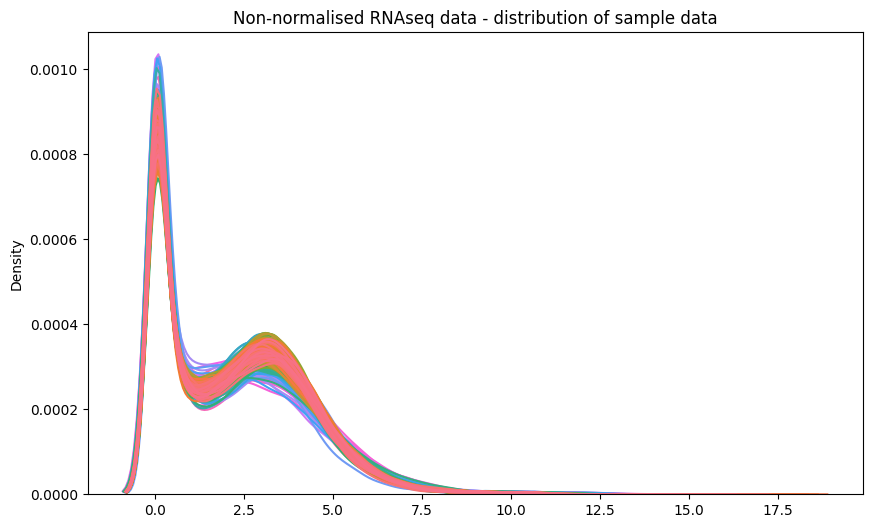

In [34]:
#Visualising the data - 

plt.figure(figsize=(10, 6))
sns.kdeplot(data=filtered_rnaseq)
plt.title("Non-normalised RNAseq data - distribution of sample data")
plt.legend().set_visible(False)
plt.show()


C:\Users\raath\AppData\Local\Temp\ipykernel_16888\4198138349.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False) #removing legend as very long - but this legend shows each line is representing a sample - I think we want it to represent each gene


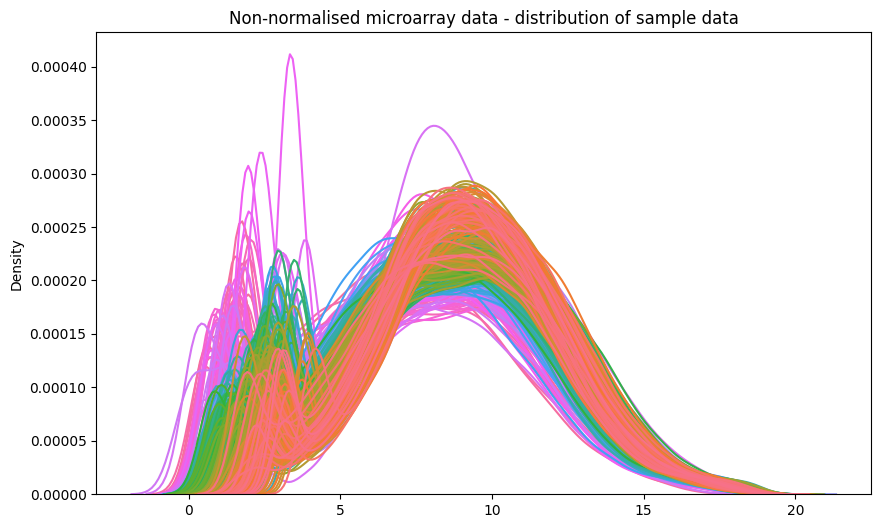

In [35]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=microarray_cleaned_noGENEID)
plt.title("Non-normalised microarray data - distribution of sample data")
plt.legend().set_visible(False) #removing legend as very long - but this legend shows each line is representing a sample - I think we want it to represent each gene 
plt.show()


## Am I Visualising right?
I'm looking at the distribution for each sample (can see this when legend added - but takes up a lot of room) - we need to look at it for each gene instead - let's transpose 

In [37]:
filtered_t_rnaseq.describe()

gene_id,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.812671,1.945274,1.107467,0.060564,0.849819,5.796886,0.010114,0.095920,1.469223,0.088262,...,3.112291,3.821410,1.201017,2.051097,3.141950,0.132418,3.233834,5.350422,3.025085,3.119732
std,0.274027,0.797624,0.370675,0.352373,0.268113,1.069429,0.069304,0.093136,0.629493,0.117673,...,0.520025,0.936223,0.266573,0.324244,0.260709,0.252030,0.463297,0.492959,0.351596,0.379358
min,0.162294,0.826085,0.270123,0.000000,0.248241,1.723624,0.000000,0.000000,0.060330,0.000000,...,1.556292,1.567219,0.416774,0.912777,1.856607,0.000000,1.604147,3.407402,1.373336,1.693271
25%,0.630710,1.577920,0.901500,0.000000,0.675620,5.157926,0.000000,0.042845,0.995461,0.026579,...,2.754714,3.149823,1.028742,1.851207,2.977694,0.012688,3.013430,5.058117,2.812654,2.918065
50%,0.789830,1.797824,1.094277,0.005005,0.825742,5.863036,0.000000,0.075546,1.380391,0.058728,...,3.119406,3.922204,1.191474,2.039702,3.151920,0.041442,3.308477,5.365066,3.066960,3.143827
75%,0.976365,2.098818,1.259516,0.019185,0.988839,6.477940,0.010119,0.130238,1.860698,0.117338,...,3.494873,4.577567,1.357683,2.256216,3.315760,0.109293,3.542051,5.655991,3.250936,3.359690
max,2.065786,8.397936,3.624674,3.423596,2.209834,9.225726,1.528361,0.573708,3.702192,1.383497,...,4.876502,5.951063,2.575903,3.592672,4.064960,2.298635,4.501356,7.175445,3.970366,4.371587


A lot of the genes are extremely 0 heavy - so they'll skewe the graph - assume i need to normalise this. Maybe code a way that removes genes where the most common expression value is 0. 

In [38]:
t_microaarray_cleaned= microarray_cleaned_noGENEID.transpose()
t_microaarray_cleaned.head()

Reporter.Identifier,28913,27262,3180,41426,37033,6190,4123,21664,10745,13510,...,3319,34832,24669,33950,39350,22435,17350,28875,8993,32006
ID,,,,,,,,,,,,,,,,,,,,,
NB001,14.99,9.20,5.06,7.45,6.74,3.84,17.27,12.14,3.04,7.85,...,7.33,9.11,13.37,6.02,7.89,10.35,17.05,5.30,13.91,14.54
NB002,14.94,10.41,5.26,8.68,6.63,4.05,17.00,12.36,4.10,7.58,...,7.94,9.95,10.52,8.32,9.69,10.33,16.62,6.84,13.57,14.45
NB003,12.48,9.27,6.45,6.30,6.75,4.91,17.79,11.72,4.27,7.82,...,8.40,7.51,10.85,6.67,7.84,9.81,17.45,5.29,13.63,14.33
NB004,14.63,8.83,2.89,7.30,6.20,3.00,17.45,11.31,4.12,7.01,...,7.46,8.54,10.04,7.28,8.20,10.36,16.72,5.33,13.84,14.76
NB005,11.89,7.97,2.00,6.26,6.57,2.07,17.38,10.90,3.10,6.50,...,6.65,8.34,11.10,7.21,7.41,9.65,16.93,4.81,13.22,14.61


C:\Users\raath\AppData\Local\Temp\ipykernel_16888\4118815913.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


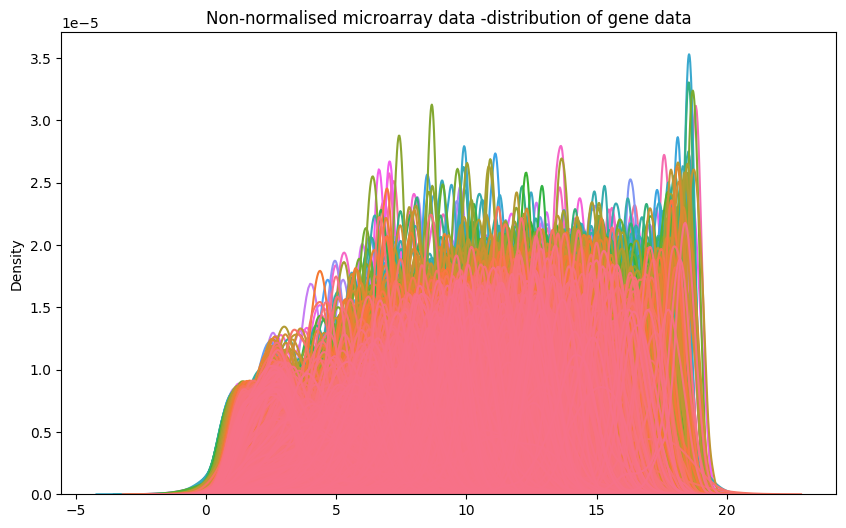

In [38]:

plt.figure(figsize=(10, 6))
sns.kdeplot(data= t_microaarray_cleaned)
plt.title("Non-normalised microarray data -distribution of gene data")
plt.legend().set_visible(False)
plt.show()

Can tell by the above graphs we need to scale the data.

## Standard Scaling


In [39]:
#scaling the data 
#firstly - z score standardisation
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
df_rnaseq_scaled = pd.DataFrame(sc.fit_transform(filtered_t_rnaseq), columns = filtered_t_rnaseq.columns, index = filtered_t_rnaseq.index)
df_microarray_scaled = pd.DataFrame(sc.fit_transform(t_microaarray_cleaned), columns = t_microaarray_cleaned.columns, index = t_microaarray_cleaned.index)

In [40]:
df_rnaseq_scaled.describe()

gene_id,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
count,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,...,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02
mean,-1.997510e-15,2.853585e-17,-5.582326e-16,2.853585e-17,-8.560756e-17,-1.740687e-15,-9.630850e-17,2.140189e-17,-8.846114e-16,3.005182e-16,...,4.465861e-15,5.421812e-16,-3.788134e-15,3.078305e-15,-5.464616e-15,-2.496887e-16,-2.311404e-15,-9.131473e-15,8.189790e-15,2.254332e-15
std,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,...,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00
min,-2.375795e+00,-1.404564e+00,-2.261243e+00,-1.720470e-01,-2.246006e+00,-3.812649e+00,-1.460787e-01,-1.030925e+00,-2.240388e+00,-7.508116e-01,...,-2.995171e+00,-2.410170e+00,-2.944897e+00,-3.514213e+00,-4.935145e+00,-5.259335e-01,-3.521120e+00,-3.945509e+00,-4.702587e+00,-3.763980e+00
25%,-6.646941e-01,-4.610230e-01,-5.562125e-01,-1.720470e-01,-6.503759e-01,-5.980783e-01,-1.460787e-01,-5.704361e-01,-7.533652e-01,-5.247125e-01,...,-6.883066e-01,-7.180578e-01,-6.469050e-01,-6.170970e-01,-6.306711e-01,-4.755394e-01,-4.762079e-01,-5.935551e-01,-6.048007e-01,-5.321348e-01
50%,-8.343814e-02,-1.850476e-01,-3.562045e-02,-1.578282e-01,-8.989326e-02,6.191761e-02,-1.460787e-01,-2.189703e-01,-1.412584e-01,-2.512348e-01,...,1.369514e-02,1.077691e-01,-3.583284e-02,-3.517843e-02,3.827937e-02,-3.613343e-01,1.612752e-01,2.973710e-02,1.192193e-01,6.357796e-02
75%,5.979641e-01,1.926953e-01,4.106088e-01,-1.175475e-01,5.190346e-01,6.374790e-01,7.552003e-05,3.688447e-01,6.225146e-01,2.473421e-01,...,7.364398e-01,8.084794e-01,5.882947e-01,6.332424e-01,6.673536e-01,-9.184774e-02,6.659366e-01,6.204905e-01,6.430038e-01,6.331741e-01
max,4.577564e+00,8.097985e+00,6.797710e+00,9.553544e+00,5.077648e+00,3.209457e+00,2.192908e+01,5.135157e+00,3.550816e+00,1.101811e+01,...,3.395964e+00,2.277015e+00,5.162812e+00,4.759143e+00,3.543950e+00,8.603719e+00,2.738624e+00,3.705904e+00,2.691247e+00,3.303248e+00


In [41]:
df_microarray_scaled.describe()


Reporter.Identifier,28913,27262,3180,41426,37033,6190,4123,21664,10745,13510,...,3319,34832,24669,33950,39350,22435,17350,28875,8993,32006
count,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,...,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02
mean,1.643308e-14,2.026046e-15,-1.598008e-15,1.064387e-14,1.141434e-15,-1.084362e-15,5.336204e-15,-1.062961e-14,-2.468351e-15,-1.369721e-15,...,-6.277888e-16,6.078137e-15,-6.563246e-16,5.535955e-15,4.109163e-15,-8.817579e-15,1.883366e-15,1.255578e-15,-2.043167e-14,6.720193e-15
std,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,...,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00
min,-3.333421e+00,-3.727957e+00,-1.676240e+00,-4.203537e+00,-3.491223e+00,-1.969873e+00,-4.688354e+00,-3.638776e+00,-2.199141e+00,-4.963694e+00,...,-2.861313e+00,-4.592080e+00,-3.151198e+00,-3.445552e+00,-3.752890e+00,-3.855087e+00,-5.525176e+00,-3.042150e+00,-3.473050e+00,-3.540262e+00
25%,-5.898736e-01,-5.874526e-01,-7.493152e-01,-5.815899e-01,-6.261775e-01,-7.675559e-01,-6.632218e-01,-6.482766e-01,-7.208121e-01,-4.538660e-01,...,-6.888085e-01,-5.653175e-01,-6.413867e-01,-5.592097e-01,-6.298221e-01,-5.269219e-01,-6.595551e-01,-6.418024e-01,-6.188789e-01,-5.758534e-01
50%,9.771532e-02,1.392068e-02,-1.539730e-01,7.041006e-02,9.008376e-02,-7.246645e-02,6.353818e-02,9.521769e-02,-2.656918e-02,1.580203e-01,...,-1.838709e-02,9.007646e-02,7.402669e-02,2.867429e-03,3.816734e-02,1.287928e-01,7.707266e-02,2.878174e-02,1.373545e-01,7.063996e-02
75%,7.058797e-01,7.489324e-01,3.886173e-01,6.554747e-01,7.343590e-01,5.263437e-01,6.784889e-01,7.561015e-01,6.574643e-01,6.414860e-01,...,6.053594e-01,7.265908e-01,7.562105e-01,6.333053e-01,6.606120e-01,7.046095e-01,6.731596e-01,8.094105e-01,7.033098e-01,6.658869e-01
max,2.612067e+00,2.043555e+00,3.184465e+00,3.342805e+00,2.274861e+00,5.638538e+00,2.933308e+00,2.375267e+00,4.032710e+00,1.935764e+00,...,3.511933e+00,2.668499e+00,2.595566e+00,4.008300e+00,4.106830e+00,2.073896e+00,2.655270e+00,2.295012e+00,2.108440e+00,2.467396e+00


Now plot again these two new scaled dataframes 

C:\Users\raath\AppData\Local\Temp\ipykernel_16888\3190646649.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


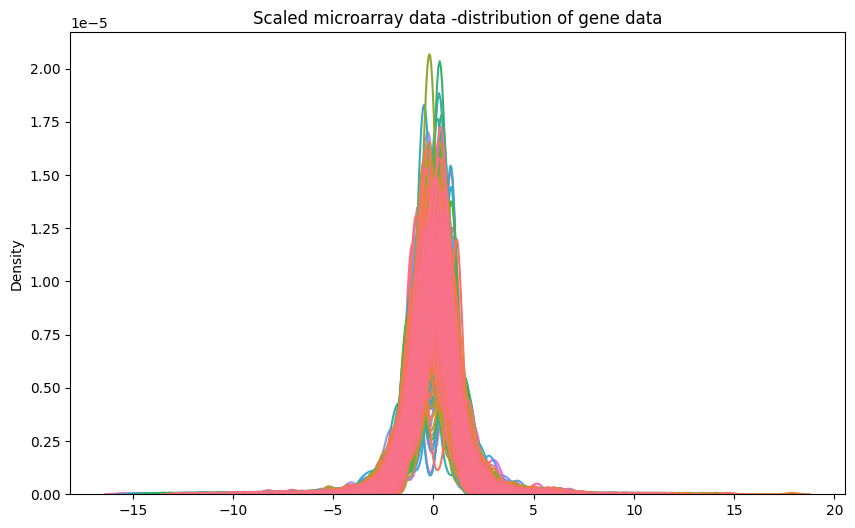

In [42]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data= df_microarray_scaled)
plt.title("Scaled microarray data -distribution of gene data")
plt.legend().set_visible(False)
plt.show()

C:\Users\raath\AppData\Local\Temp\ipykernel_16888\680634322.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


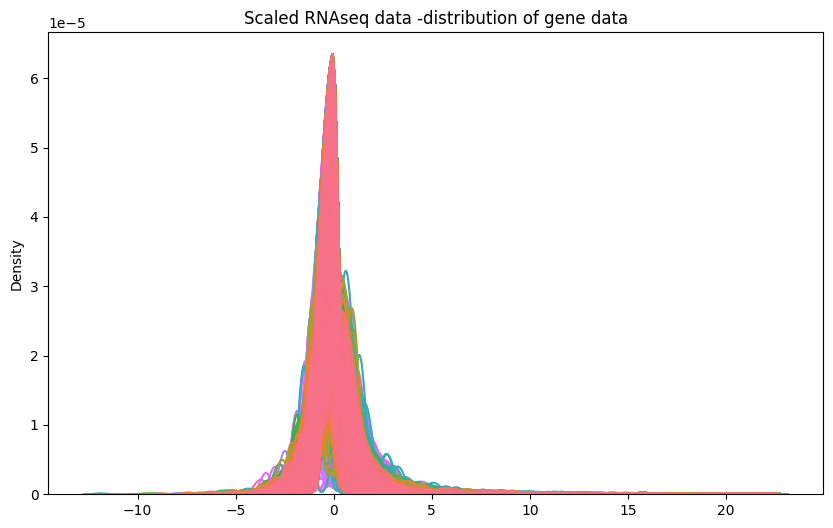

In [43]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data= df_rnaseq_scaled)
plt.title("Scaled RNAseq data -distribution of gene data")
plt.legend().set_visible(False)
plt.show()

Now seperate the data into training and test - need to ensure they match the y data - let's use using rownames/column names.

In [42]:
#access the names of the patients in the test and train data as well as the two dataframes - to ensure they match 
test_patients = df_patient_info_test.index.tolist()
train_patients = df_patient_info_train.index.tolist()
index_df_rnaseq_scaled = df_rnaseq_scaled.index.tolist()
index_df_microarray_scaled = df_microarray_scaled.index.tolist()

In [43]:
test_patients
index_df_rnaseq_scaled


['NB001',
 'NB002',
 'NB003',
 'NB004',
 'NB005',
 'NB006',
 'NB007',
 'NB008',
 'NB009',
 'NB010',
 'NB011',
 'NB012',
 'NB013_BC02FPACXX_L1_CGATGT',
 'NB014_BC02FPACXX_L1_TGACCA',
 'NB015_BC02FPACXX_L1_ACAGTG',
 'NB016_BC02FPACXX_L1_GCCAAT',
 'NB017_BC02FPACXX_L1_CAGATC',
 'NB018_BC02FPACXX_L1_CTTGTA',
 'NB019_BC02FPACXX_L2_CGATGT',
 'NB020_BC02FPACXX_L2_TGACCA',
 'NB021_BC02FPACXX_L2_ACAGTG',
 'NB022_BC02FPACXX_L2_GCCAAT',
 'NB023_BC02FPACXX_L2_CAGATC',
 'NB024_BC02FPACXX_L2_CTTGTA',
 'NB025_BC02FPACXX_L3_CGATGT',
 'NB026_BC02FPACXX_L3_TGACCA',
 'NB027_BC02FPACXX_L3_ACAGTG',
 'NB028_BC02FPACXX_L3_GCCAAT',
 'NB029_BC02FPACXX_L3_CAGATC',
 'NB030_BC02FPACXX_L3_CTTGTA',
 'NB031_BC02FPACXX_L4_CGATGT',
 'NB032_BC02FPACXX_L4_TGACCA',
 'NB033_BC02FPACXX_L4_ACAGTG',
 'NB034_BC02FPACXX_L4_GCCAAT',
 'NB035_BC02FPACXX_L4_CAGATC',
 'NB036_BC02FPACXX_L4_CTTGTA',
 'NB037_BC02FPACXX_L5_CGATGT',
 'NB038_BC02FPACXX_L5_TGACCA',
 'NB039_BC02FPACXX_L5_ACAGTG',
 'NB040_BC02FPACXX_L5_GCCAAT',
 'NB041_BC02

In [44]:
#need to get rid of the letters
#truncate the rownames to a length of 5
df_rnaseq_scaled.index = df_rnaseq_scaled.index.str[:5]


In [45]:
X_train_microarray = df_microarray_scaled.loc[train_patients]
X_test_microarray = df_microarray_scaled.loc[test_patients]
X_train_rnaseq = df_rnaseq_scaled.loc[train_patients]
X_test_rnaseq = df_rnaseq_scaled.loc[test_patients]

In [46]:
X_test_microarray

Reporter.Identifier,28913,27262,3180,41426,37033,6190,4123,21664,10745,13510,...,3319,34832,24669,33950,39350,22435,17350,28875,8993,32006
ID,,,,,,,,,,,,,,,,,,,,,
NB498,-1.163999,-0.888139,-0.131365,0.209239,0.518401,0.040251,-0.011001,0.458704,-0.230758,0.424934,...,-0.637890,-0.546438,0.687797,-0.012324,0.966412,-0.097126,-0.756480,-0.841258,-0.409085,0.039104
NB496,1.005423,-0.336880,-0.319765,-0.127917,-0.395822,-0.194577,0.305792,0.293483,-0.402277,-0.229759,...,-0.705781,0.176383,-0.015889,0.159844,1.217993,0.211446,0.833085,0.293577,0.625247,-0.039737
NB494,-0.537680,-0.320176,-0.485556,-0.514655,1.108686,-0.363653,-0.309159,-0.516100,0.618668,0.122768,...,0.830248,0.090076,0.257767,-0.913673,-0.430293,0.508997,0.038303,-0.256646,-0.331022,-0.591622
NB492,-0.210905,-1.798551,-1.005538,-0.593985,-0.770150,-1.086921,-0.663222,-1.094373,-1.170028,-1.247052,...,-1.265880,-1.129010,0.023205,-0.711122,-1.211060,-1.155086,-0.194317,-0.291035,-1.228745,-0.954289
NB490,-0.510449,-1.848666,-1.608417,-1.317879,-0.726958,-1.791404,-1.017284,-2.697016,-1.798931,-1.841312,...,-0.060819,-1.064280,-0.078438,-0.073089,-1.896399,-2.334270,-0.039237,-1.040714,-2.907095,-1.663855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NB010,-1.200307,0.222731,-0.153973,0.407566,-0.863732,-0.025501,1.256170,0.442182,-0.149083,0.273851,...,-0.196600,0.197960,-1.055779,1.962542,-0.196063,0.707365,1.162629,0.946966,0.781373,1.458236
NB008,-1.445388,0.481655,2.769986,0.080326,-0.590184,1.327105,1.628867,-0.020437,0.144950,0.968833,...,0.414417,-1.290836,-1.313797,0.959918,-0.248114,0.817569,2.442036,0.554932,0.508153,0.953655
NB006,1.359430,1.826393,1.571766,0.595977,0.280847,0.857450,-0.327794,0.574358,1.125057,1.190421,...,-0.977344,1.460200,-1.337253,1.132085,0.766883,1.071038,1.705408,1.414656,0.234933,0.070640


In [47]:
X_train_microarray

Reporter.Identifier,28913,27262,3180,41426,37033,6190,4123,21664,10745,13510,...,3319,34832,24669,33950,39350,22435,17350,28875,8993,32006
ID,,,,,,,,,,,,,,,,,,,,,
NB497,0.397259,-0.478871,-0.063541,1.220707,0.475209,0.124789,0.902107,0.756101,-0.165418,0.364500,...,-0.001414,0.402939,0.265585,-0.700995,0.749533,0.542058,0.581081,-0.036557,1.366844,0.717133
NB495,0.179409,0.348017,-0.342372,0.586060,1.043899,-0.166397,0.287157,0.690013,-0.328769,0.122768,...,0.618089,0.607919,0.781621,0.382649,0.359149,0.663283,0.678006,1.572845,1.152171,0.985192
NB493,0.279257,-0.437109,0.584553,-0.296495,-1.022101,-0.485763,-0.309159,1.020455,1.247571,0.112695,...,-0.230546,-0.222787,-0.813399,-1.045330,-0.282815,0.751446,-0.678940,-0.428591,1.015561,-0.686230
NB491,1.259582,-0.980016,-1.095970,-1.377377,-1.497209,-1.133887,-1.389982,-0.912630,-1.219034,-1.277268,...,0.550198,0.575553,0.132667,0.645965,0.463252,-1.397535,-1.512493,-1.233292,-1.365354,-1.001593
NB489,0.025099,-1.573036,-1.344657,-1.536039,-0.748554,-1.706866,-0.048271,-0.648277,-0.941336,-0.471492,...,-1.231935,-1.129010,-0.750849,0.413032,-2.026527,-0.978759,0.639236,-0.339180,-1.306807,-0.749303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NB009,-1.717701,1.016209,2.800130,1.111627,-0.338233,2.463671,0.063538,0.524792,1.329246,0.696883,...,0.685980,-1.797890,-0.539743,1.689099,0.220346,0.740426,0.329077,0.747510,0.098323,0.874815
NB007,-0.474141,1.233372,0.252970,0.526562,0.835139,0.932595,0.175347,-1.507425,0.839193,1.200493,...,0.100422,-0.373824,-0.383369,0.595327,0.905686,-0.350595,0.077073,1.345878,0.078807,0.117944
NB005,-1.545236,-0.144775,-0.538308,-0.633651,0.683969,-0.485763,0.063538,-1.424815,0.332804,-0.149182,...,-1.197989,-0.719052,-0.445919,0.180099,-0.326191,0.178385,0.232152,0.169776,-0.877462,0.654061


Have split the data into train and test and preprocessed successfully, now let's fit the network to impute the values 

# FITTING MODELS Neural Network
Utilise tensor flow and keras (deep learning framework) in order to create our neural network. Will need to one hot encode the data before it is passed into the model. 

A number of techniques have been utilized to increase accuracy such as cross validarion, regularization and optimization.
# 1. Neural Network

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut, GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score

In [49]:
y_train_dfd = df_patient_info_train['FactorValue..death.from.disease.'].astype(int)
y_train_hr = df_patient_info_train['FactorValue..high.risk.'].astype(int)
y_train_progr = df_patient_info_train['FactorValue..progression.'].astype(int)
df_patient_info_train_copy = df_patient_info_train.copy()
df_patient_info_train_copy['FactorValue..inss.stage.']  = df_patient_info_train_copy['FactorValue..inss.stage.'].map(
    {
        '1':'0',
        '2':'0',
        '3':'0',
        '4':'1',
        '4S':'1',
    })
#defining stage 3 or lower as 0 and stage 4 or higher as 1 
df_patient_info_train_copy['FactorValue..inss.stage.'].value_counts()
y_train_inss_split = df_patient_info_train_copy['FactorValue..inss.stage.'].astype(int)
y_train_inss = df_patient_info_train_copy['FactorValue..inss.stage.']

df_patient_info_train

FactorValues,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
ID,,,,,,
NB497,female,379,0.0,0.0,1,0.0
NB495,male,163,0.0,0.0,1,0.0
NB493,male,190,0.0,0.0,1,0.0
NB491,male,2326,0.0,1.0,4,1.0
NB489,female,865,0.0,1.0,4,0.0
...,...,...,...,...,...,...
NB009,female,217,0.0,1.0,4S,0.0
NB007,male,942,0.0,1.0,4,1.0
NB005,female,536,1.0,1.0,4,1.0


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers, losses, optimizers, metrics, regularizers

In [3]:
from sklearn.model_selection import KFold
from tensorflow.keras import models, layers, regularizers, optimizers, metrics, losses
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score

def train_and_evaluate_nn_model(X_train, y_train, model, kf):
    total_accuracy_score = 0
    total_f1_score = 0
    
    # Iterate through each fold
    for train_index, test_index in kf.split(X_train):
        # Split the data into training and validation sets
        X_train_val, X_test_val = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_val, y_test_val = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Encode target variable if it's not already one-hot encoded
        y_train_val_encoded = LabelEncoder().fit_transform(y_train_val)
        y_test_val_encoded = LabelEncoder().fit_transform(y_test_val)
        
        # Convert target variable to one-hot encoding
        y_train_val_one_hot = tf.keras.utils.to_categorical(y_train_val_encoded, num_classes=3)
        y_test_val_one_hot = tf.keras.utils.to_categorical(y_test_val_encoded, num_classes=3)
        
        # Train the neural network model
        model_log = model.fit(X_train_val, y_train_val_one_hot, 
                              batch_size=10, 
                              validation_data=(X_test_val, y_test_val_one_hot), 
                              epochs=1000,
                              verbose=False)
        
        # Make predictions on the validation set
        y_predictions = model.predict(X_test_val)
        # Decode one-hot encoded predictions
        y_predictions_decoded = [tf.argmax(pred).numpy() for pred in y_predictions]
        
        # Evaluate performance metrics for the fold
        total_accuracy_score += accuracy_score(y_test_val_encoded, y_predictions_decoded)
        total_f1_score += f1_score(y_test_val_encoded, y_predictions_decoded, average='macro')
    
    # Calculate mean accuracy and F1 score over all folds
    mean_accuracy = total_accuracy_score / kf.n_splits
    mean_f1_score = total_f1_score / kf.n_splits
    
    return mean_accuracy, mean_f1_score

def build_nn_model(input_shape):
    # Build a neural network model with regularization
    # L2 weight penalty to prevent overfitting
    # Adds weight term which is proportional to the mag. of weights
    modelnn = models.Sequential()
    regularizer = regularizers.L2(0.01)
    neurons_per_layer = [10, 30, 10]
    
    # Add hidden layers with ReLU activation and L2 regularization
    for num_neurons in neurons_per_layer:
        modelnn.add(layers.Dense(num_neurons, activation=tf.nn.relu, kernel_regularizer=regularizer))
    
    # Add output layer with softmax activation for multiclass classification
    modelnn.add(layers.Dense(3, activation=tf.nn.softmax))
    modelnn.build(input_shape=(None, input_shape))
    
    # Configure optimizer, loss, and metrics for training
    # adam optim - allows dynamic change in lr over time
    lr = 0.0001
    xe_loss = losses.CategoricalCrossentropy(label_smoothing=0.2)
    adam_optim = optimizers.Adam(learning_rate=lr)
    modelnn.compile(optimizer=adam_optim, loss=xe_loss, metrics=[metrics.CategoricalAccuracy()])
    
    return modelnn

def modelling(X_train, y_train):
    # Configure K-Fold cross-validation
    kf = KFold(n_splits=5, random_state=27, shuffle=True)
    
    # Get input shape for the neural network model
    input_shape = X_train.shape[1]
    # Build the neural network model
    modelnn = build_nn_model(input_shape)
    
    # Train and evaluate the neural network model using K-Fold cross-validation
    mean_accuracy_nn, mean_f1_nn = train_and_evaluate_nn_model(X_train, y_train, modelnn, kf)
    
    # Print results
    print(f'Mean accuracy of neural network model is: {mean_accuracy_nn}')
    print(f'Mean F1 score of neural network model is: {mean_f1_nn}')



In [50]:
modelling(X_train_microarray, y_train_dfd)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean accuracy of neural network model is: 0.8313469387755102
Mean F1 score of neural network model is: 0.7203828773272252


In [ ]:
modelling(X_train_rnaseq, y_train_dfd)

In [ ]:
modelling(X_train_microarray, y_train_hr)
modelling(X_train_rnaseq, y_train_hr)

In [ ]:
modelling(X_train_microarray, y_train_progr)
modelling(X_train_rnaseq, y_train_progr)

In [ ]:
modelling(X_train_microarray, y_train_inss)
modelling(X_train_rnaseq, y_train_inss)

## Results 
After comparing the accuracy to other ML algorithms computed by my teammates we find that the NN performs best when predicting death from disease and high risk. Also we have found the model predicts better using the RNASeq data.

Let's tweak the model and pass the data through to make some final predictions.

In [51]:
from tensorflow.keras import models, layers, regularizers, optimizers, metrics, losses
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

def train_nn_model(X_train, y_train):
    # Build a neural network model with regularization
    modelnn = models.Sequential()
    regularizer = regularizers.L2(0.01)
    neurons_per_layer = [10, 30, 10]
    
    # Add hidden layers with ReLU activation and L2 regularization
    for num_neurons in neurons_per_layer:
        modelnn.add(layers.Dense(num_neurons, activation=tf.nn.relu, kernel_regularizer=regularizer))
    
    # Add output layer with softmax activation for multiclass classification
    modelnn.add(layers.Dense(3, activation=tf.nn.softmax))
    
    # Encode target variable for training
    y_train_encoded = LabelEncoder().fit_transform(y_train)
    y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded, num_classes=3)
    
    # Configure optimizer, loss, and metrics for training
    lr = 0.0001
    xe_loss = losses.CategoricalCrossentropy(label_smoothing=0.2)
    adam_optim = optimizers.Adam(learning_rate=lr)
    modelnn.compile(optimizer=adam_optim, loss=xe_loss, metrics=[metrics.CategoricalAccuracy()])
    
    # Train the neural network model
    modelnn.fit(X_train, y_train_one_hot, epochs=1000, batch_size=10, verbose=False)
    
    return modelnn

def make_predictions(model, X_test):
    # Make predictions on new data
    y_predictions = model.predict(X_test)
    # Decode one-hot encoded predictions
    y_predictions_decoded = [tf.argmax(pred).numpy() for pred in y_predictions]
    
    return y_predictions_decoded

# Assuming X_train_microarray and y_train are your training data
# and X_test is your new data for prediction





In [52]:
# Train the neural network model
trained_model = train_nn_model(X_train_rnaseq, y_train_dfd)

# Make predictions on new data
predictions = make_predictions(trained_model, X_test_rnaseq)

# Print or use predictions as needed
print(predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


In [53]:
# Train the neural network model
trained_model = train_nn_model(X_train_rnaseq, y_train_hr)

# Make predictions on new data
predictionshr = make_predictions(trained_model, X_test_rnaseq)

# Print or use predictions as needed
print(predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


In [54]:
df_patient_info_test.loc[:,'FactorValue..high.risk.'] = predictionshr
df_patient_info_test[['FactorValue..high.risk.']]

FactorValues,FactorValue..high.risk.
ID,
NB498,0.0
NB496,0.0
NB494,0.0
NB492,1.0
NB490,1.0
...,...
NB010,1.0
NB008,1.0
NB006,0.0


In [55]:
df_patient_info_test.loc[:,'FactorValue..death.from.disease.'] = predictions
df_patient_info_test[['FactorValue..death.from.disease.']]

FactorValues,FactorValue..death.from.disease.
ID,
NB498,0.0
NB496,0.0
NB494,0.0
NB492,0.0
NB490,0.0
...,...
NB010,0.0
NB008,0.0
NB006,0.0


In [56]:
df_patient_info_test['FactorValue..death.from.disease.'].value_counts()

FactorValue..death.from.disease.
0.0    205
1.0     44
Name: count, dtype: int64

Preprocess and value imputation using Neural Network all complete!